In [40]:
# import packages we need for exploratory data analysis (EDA)
# to store tabular data
import pandas as pd
# to do some math
import numpy as np 
# a popular data visualization tool
import matplotlib.pyplot as plt 
# another popular data visualization tool
import seaborn as sns
# allows the notebook to render graphics
%matplotlib inline 
# a popular data visualization theme
plt.style.use('fivethirtyeight')

import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [41]:
df = pd.read_csv("C:/Users/aath/Dropbox/MAEN/Thankful/Data/hcad/Has_mort_agent Query SpringBranch2.csv")
df['HAS_MORT'] = df['Has_mort_agent_ACCOUNT'].apply(lambda x: 'yes' if not pd.isnull(x) else 'no')

df1 = df[['NEIGHBORHOOD_CODE','STATE_CLASS','TOTAL_BUILDING_AREA','TOTAL_LAND_AREA','LAND_VALUE',
          'TOTAL_APPRAISED_VALUE','TOTAL_MARKET_VALUE','HAS_MORT']]

In [42]:
df1.astype(bool).sum(axis=0)

NEIGHBORHOOD_CODE        11159
STATE_CLASS              11159
TOTAL_BUILDING_AREA      11159
TOTAL_LAND_AREA          11159
LAND_VALUE               11159
TOTAL_APPRAISED_VALUE    11159
TOTAL_MARKET_VALUE       11159
HAS_MORT                 11159
dtype: int64

In [43]:
# Drop NA everywhere
df2=df1.dropna(axis=0, how='any')

In [44]:
df2.astype(bool).sum(axis=0)

NEIGHBORHOOD_CODE        11155
STATE_CLASS              11155
TOTAL_BUILDING_AREA      11155
TOTAL_LAND_AREA          11155
LAND_VALUE               11155
TOTAL_APPRAISED_VALUE    11155
TOTAL_MARKET_VALUE       11155
HAS_MORT                 11155
dtype: int64

In [45]:
df2.isnull().sum()

NEIGHBORHOOD_CODE        0
STATE_CLASS              0
TOTAL_BUILDING_AREA      0
TOTAL_LAND_AREA          0
LAND_VALUE               0
TOTAL_APPRAISED_VALUE    0
TOTAL_MARKET_VALUE       0
HAS_MORT                 0
dtype: int64

In [46]:
df2.describe()

,NEIGHBORHOOD_CODE,TOTAL_BUILDING_AREA,TOTAL_LAND_AREA,LAND_VALUE,TOTAL_APPRAISED_VALUE,TOTAL_MARKET_VALUE
count,11155.000000,11155.000000,1.115500e+04,1.115500e+04,1.115500e+04,1.115500e+04
mean,7983.364276,5232.283371,7.945548e+04,2.885993e+05,4.606525e+05,4.824939e+05
std,712.843670,23694.651502,6.434430e+06,5.763057e+05,9.462034e+05,9.442990e+05
min,202.000000,160.000000,7.120000e+02,5.880000e+03,1.000000e+02,9.631000e+03
25%,7759.000000,1370.000000,7.800000e+03,8.662500e+04,1.538455e+05,1.760435e+05
50%,7795.000000,1737.000000,9.600000e+03,1.650000e+05,2.282190e+05,2.509730e+05
75%,7813.040000,2549.500000,1.353350e+04,3.307950e+05,4.677445e+05,5.124045e+05
max,9999.000000,869551.000000,6.795862e+08,1.789955e+07,2.183024e+07,2.183024e+07


In [47]:
df3=df2

In [48]:
df3['NEIGHBORHOOD_CODE'].value_counts().head()

7813.04    779
7770.00    524
7759.00    462
7728.00    416
7773.00    403
Name: NEIGHBORHOOD_CODE, dtype: int64

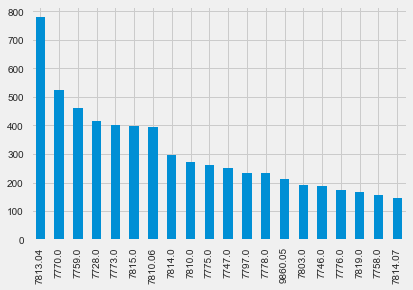

In [49]:
# Most populated neighborhood
df3['NEIGHBORHOOD_CODE'].value_counts().sort_values(ascending=False).head(20).plot(kind='bar')

In [51]:
# Test the condition of dataset
df3.head(5)

,NEIGHBORHOOD_CODE,STATE_CLASS,TOTAL_BUILDING_AREA,TOTAL_LAND_AREA,LAND_VALUE,TOTAL_APPRAISED_VALUE,TOTAL_MARKET_VALUE,HAS_MORT
0,9879.10,F2,83200,294295,2354360.0,4400000.0,4400000.0,yes
1,9855.00,F1,61728,258093,2580930.0,5556093.0,5556093.0,no
2,5987.27,F1,21185,63379,633790.0,2279221.0,2279221.0,no
3,9879.10,F1,15780,63659,509272.0,774000.0,774000.0,no
4,9855.00,F1,47219,101882,1018820.0,1456910.0,1456910.0,no


In [89]:
# Remove outliers which means any building larder thatn 5000 sqf

df3a = df3.drop(df3[df3.TOTAL_BUILDING_AREA > 5000].index)

In [94]:
# Remove outliers which means any land larder thatn 40,000 sqf

df4 = df3a.drop(df3a[df3a.TOTAL_LAND_AREA > 40000].index)

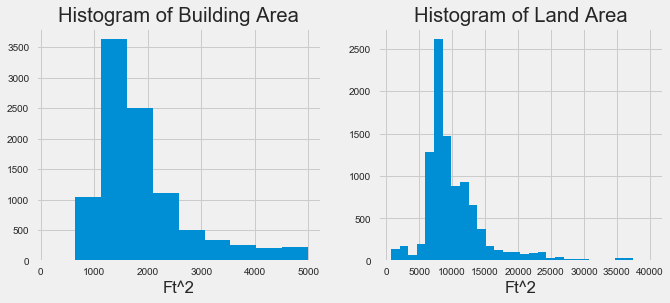

In [96]:
# Visualization of building and land versus value

fig = plt.figure(figsize=(10, 4))
sqft = fig.add_subplot(121)
cost = fig.add_subplot(122)

sqft.hist(df4.TOTAL_BUILDING_AREA, bins=10)
sqft.set_xlabel('Ft^2')
sqft.set_title("Histogram of Building Area")

cost.hist(df4.TOTAL_LAND_AREA, bins=30)
cost.set_xlabel('Ft^2')
cost.set_title("Histogram of Land Area")


plt.show()

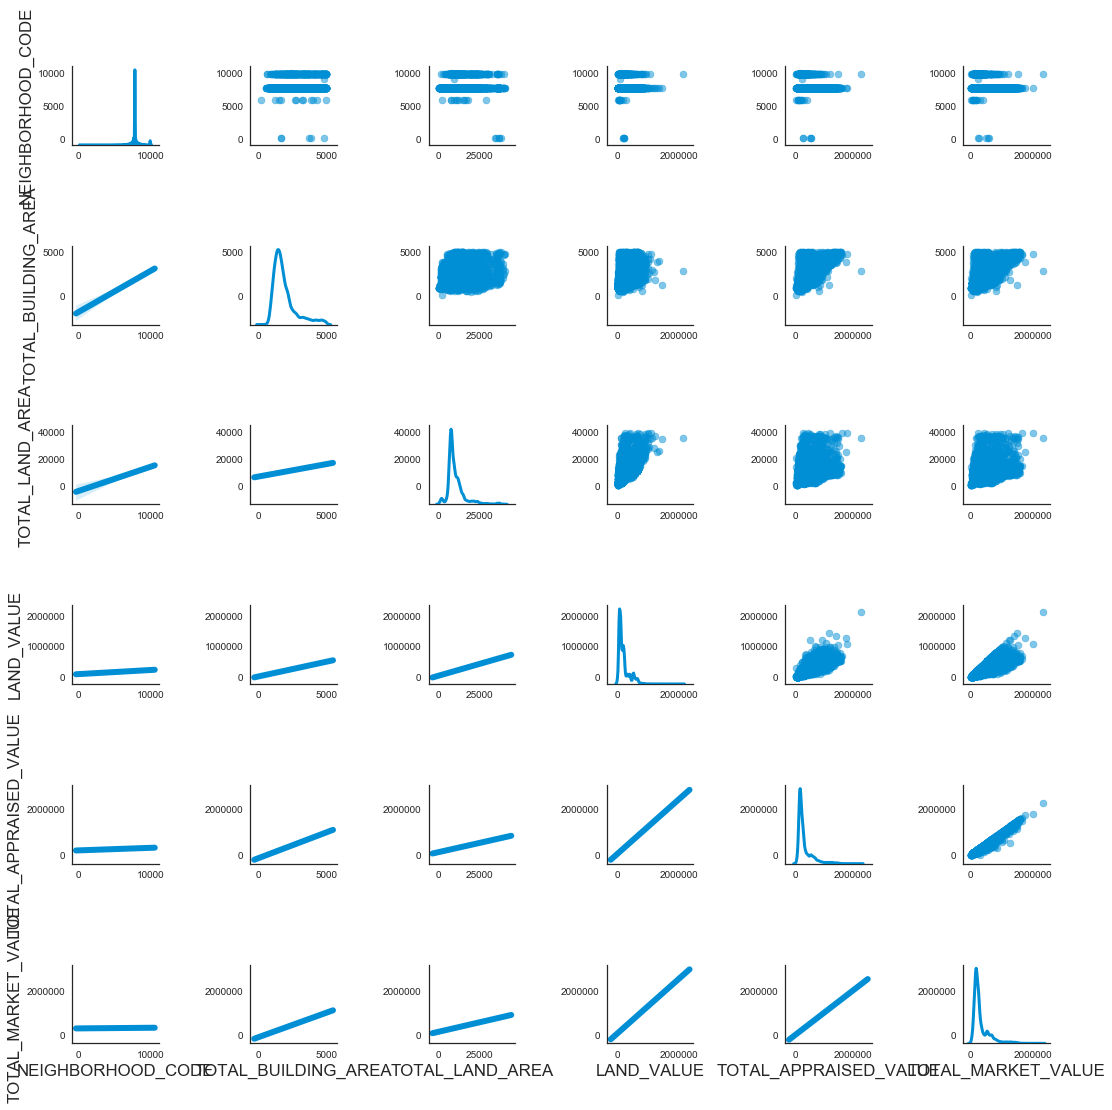

In [97]:
# Make the scatterplot matrix. This will help to define the research questions to be asked

sns.set_style("white")


# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df4, diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

                       NEIGHBORHOOD_CODE  TOTAL_BUILDING_AREA  \
NEIGHBORHOOD_CODE               1.000000             0.239409   
TOTAL_BUILDING_AREA             0.239409             1.000000   
TOTAL_LAND_AREA                 0.156508             0.309439   
LAND_VALUE                      0.034231             0.471508   
TOTAL_APPRAISED_VALUE           0.019431             0.750333   
TOTAL_MARKET_VALUE              0.004911             0.737079   

                       TOTAL_LAND_AREA  LAND_VALUE  TOTAL_APPRAISED_VALUE  \
NEIGHBORHOOD_CODE             0.156508    0.034231               0.019431   
TOTAL_BUILDING_AREA           0.309439    0.471508               0.750333   
TOTAL_LAND_AREA               1.000000    0.464186               0.330419   
LAND_VALUE                    0.464186    1.000000               0.814776   
TOTAL_APPRAISED_VALUE         0.330419    0.814776               1.000000   
TOTAL_MARKET_VALUE            0.350805    0.842106               0.988695   

    

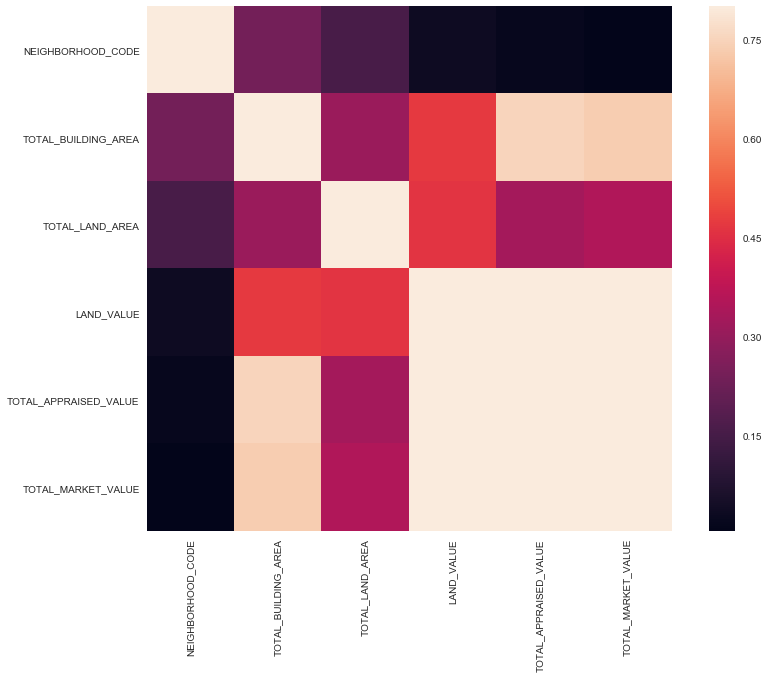

In [98]:
# Make the correlation matrix. This will help to pick relevants features for more detailed analysis

corrmat = df4.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()
# Heatmaps are a great way to get a quick visual read on a big correlation matrix.

# Try to match the correlation numbers to the scatterplots above to get a 
# sense of what each magnitude of correlation can look like.



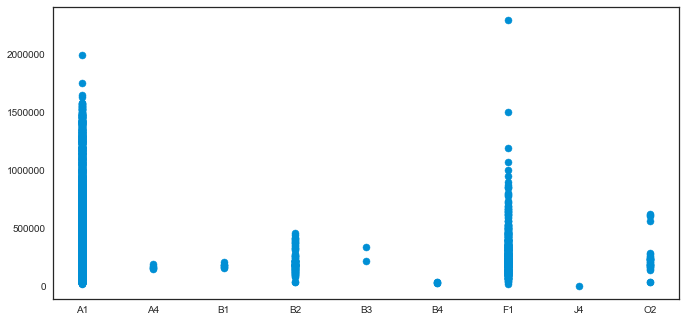

In [100]:
# What types of properties are most popular in these zip codes

x = df4['STATE_CLASS']
y = df4['TOTAL_MARKET_VALUE']
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x, y)
plt.show()

Text(0.5,1,'Top 20 Neighborhood vs. Value ')

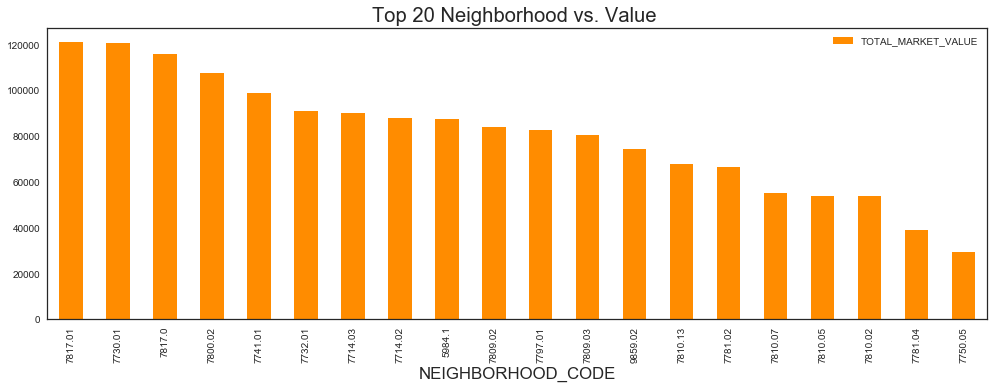

In [102]:
# Which neighborhood has the highest market value
fig = plt.figure(figsize=(15,5))
ax = fig.gca()
 
df4.groupby('NEIGHBORHOOD_CODE')[['TOTAL_MARKET_VALUE']].mean().sort_values(
'TOTAL_MARKET_VALUE', ascending=False).tail(20).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Top 20 Neighborhood vs. Value ')

Text(0.5,1,'Top 10 Property Types vs. Value ')

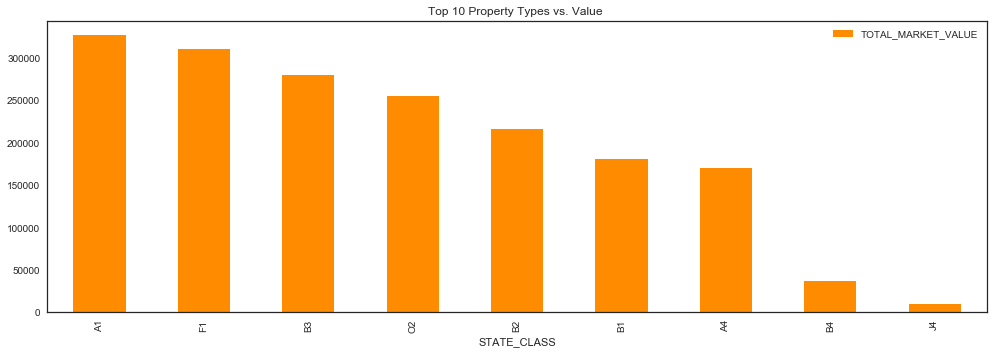

In [155]:
# Which class type has the highest market value
fig = plt.figure(figsize=(15,5))
ax = fig.gca()
 
df4.groupby('STATE_CLASS')[['TOTAL_MARKET_VALUE']].mean().sort_values(
'TOTAL_MARKET_VALUE', ascending=False).tail(10).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Top 10 Property Types vs. Value ')

In [156]:
# Inspect integrity of dataset

df4.head(10)

,NEIGHBORHOOD_CODE,STATE_CLASS,TOTAL_BUILDING_AREA,TOTAL_LAND_AREA,LAND_VALUE,TOTAL_APPRAISED_VALUE,TOTAL_MARKET_VALUE,HAS_MORT
31,7814.07,A1,3099,18312,606240.0,758619.0,758619.0,no
36,9860.20,F1,1704,15625,312500.0,380820.0,380820.0,no
37,9860.20,F1,4340,15784,315680.0,689264.0,689264.0,no
38,9860.20,F1,2964,8000,160000.0,267251.0,267251.0,no
39,9860.20,F1,2704,9769,195380.0,277318.0,277318.0,no
40,9860.20,F1,3498,8712,174240.0,267454.0,267454.0,no
41,7814.07,A1,3852,35937,838898.0,1039383.0,1048629.0,no
42,9860.20,F1,1416,5166,103320.0,138400.0,138400.0,no
46,9872.10,F1,4807,10846,48807.0,101307.0,101307.0,no
51,9872.10,F1,1854,7405,44430.0,70830.0,70830.0,no


In [107]:
df4.isnull().sum()

NEIGHBORHOOD_CODE        0
STATE_CLASS              0
TOTAL_BUILDING_AREA      0
TOTAL_LAND_AREA          0
LAND_VALUE               0
TOTAL_APPRAISED_VALUE    0
TOTAL_MARKET_VALUE       0
HAS_MORT                 0
dtype: int64

In [116]:
# Focus only on residential properties

df_res = df4.loc[
    ((df4['STATE_CLASS'] =='A1') | (df4['STATE_CLASS'] =='A2') | (df4['STATE_CLASS'] =='B1') |
     (df4['STATE_CLASS'] =='B2') | (df4['STATE_CLASS'] =='B3') | (df4['STATE_CLASS'] =='B4'))]                                                           

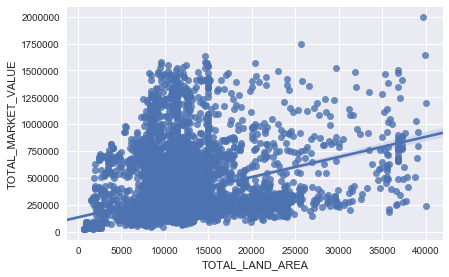

In [118]:
# Land size versus value

import seaborn as sns; sns.set(color_codes=True)
#df_res = sns.load_dataset("df_res")
ax = sns.regplot(x="TOTAL_LAND_AREA", y="TOTAL_MARKET_VALUE", data=df_res)

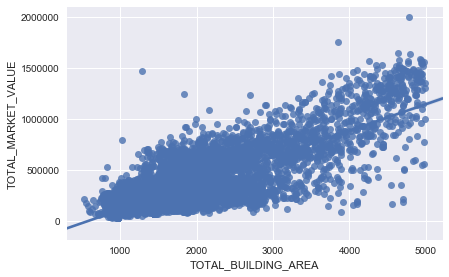

In [119]:
# Building size versus value

import seaborn as sns; sns.set(color_codes=True)
#df_res = sns.load_dataset("df_res")
ax = sns.regplot(x="TOTAL_BUILDING_AREA", y="TOTAL_MARKET_VALUE", data=df_res)

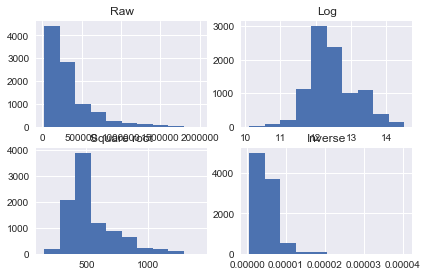

In [122]:
# Simple transformation of total market value

# Making a four-panel plot.
fig = plt.figure()

fig.add_subplot(221)
plt.hist(df_res['TOTAL_MARKET_VALUE'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df_res['TOTAL_MARKET_VALUE'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df_res['TOTAL_MARKET_VALUE'].dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/df_res['TOTAL_MARKET_VALUE'].dropna())
plt.title('Inverse')
plt.show()

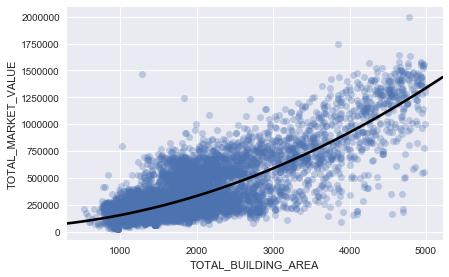

In [123]:
# Any visible trend btween building size and market value

sns.regplot(
    df_res['TOTAL_BUILDING_AREA'],
    y=df_res['TOTAL_MARKET_VALUE'],
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()


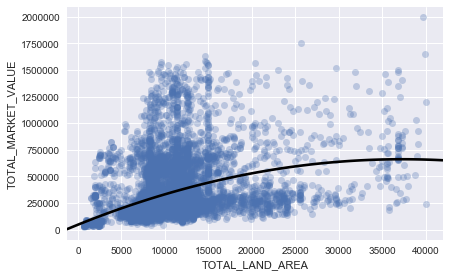

In [124]:
# Any visible trend btween land size and market value

sns.regplot(
    df_res['TOTAL_LAND_AREA'],
    y=df_res['TOTAL_MARKET_VALUE'],
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

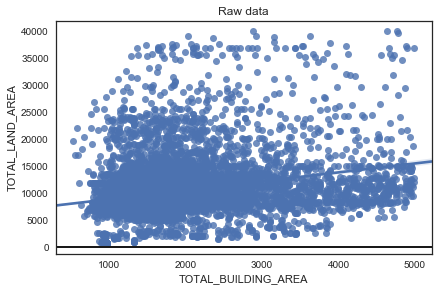

In [125]:
# What is the scale between building and land size

sns.set_style("white")

t = sns.regplot(
    'TOTAL_BUILDING_AREA',
    'TOTAL_LAND_AREA',
    df_res,
   # x_jitter=.49,
   # y_jitter=.49,
    #fit_reg=False
)
#t.set(xlim=(-1, 11), ylim=(-1, 11))
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Raw data')
plt.show()

C:\Users\aath\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\aath\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


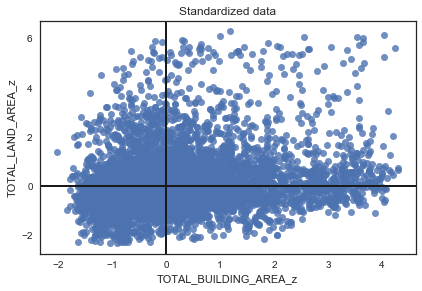

In [126]:
# Standardizing variables by subtracting the mean and dividing by the standard
# deviation. Now both variables are on the same scale.

df_res['TOTAL_BUILDING_AREA_z'] = (df_res['TOTAL_BUILDING_AREA'] - df_res['TOTAL_BUILDING_AREA'].mean()) /df_res['TOTAL_BUILDING_AREA'].std()

df_res['TOTAL_LAND_AREA_z'] = (df_res['TOTAL_LAND_AREA'] - df_res['TOTAL_LAND_AREA'].mean()) / df_res['TOTAL_LAND_AREA'].std()

t = sns.regplot(
    'TOTAL_BUILDING_AREA_z',
    'TOTAL_LAND_AREA_z',
    df_res,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standardized data')
plt.show()

C:\Users\aath\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\aath\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


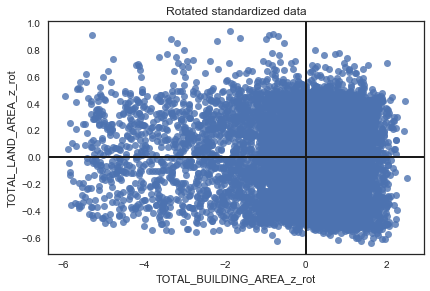

In [128]:
# Rotating the data so that the axes roughly match to vector above.
df_res['TOTAL_BUILDING_AREA_z_rot'] = math.cos(40) * df_res['TOTAL_BUILDING_AREA_z'] - math.sin(40) * df_res['TOTAL_BUILDING_AREA_z']
df_res['TOTAL_LAND_AREA_z_rot'] = math.sin(40) * df_res['TOTAL_LAND_AREA_z'] + math.cos(40) * df_res['TOTAL_LAND_AREA_z']

t = sns.regplot(
    'TOTAL_BUILDING_AREA_z_rot',
    'TOTAL_LAND_AREA_z_rot',
    df_res,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Rotated standardized data')
plt.show()

df_res.is_copy = False


In [139]:
# Take a subset of the data for PCA 
df_res2 = df_res[['TOTAL_BUILDING_AREA','TOTAL_LAND_AREA', 'TOTAL_MARKET_VALUE']]  

# Normalize the data so that all variables have a mean of 0 and standard deviation
# of 1.
X = StandardScaler().fit_transform(df_res2)

# The NumPy covariance function assumes that variables are represented by rows,
# not columns, so we transpose X.
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

Covariance Matrix:
 [[ 1.00010601  0.27050976  0.8013306 ]
 [ 0.27050976  1.00010601  0.35553311]
 [ 0.8013306   0.35553311  1.00010601]]


In [140]:
# Calculating eigenvalues and eigenvectors.
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

In [143]:
# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 3).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1: 
[[-0.63651239]
 [-0.40608969]
 [-0.6557005 ]]
Eigenvalue 1: 1.9981762940982053
----------------------------------------
Eigenvector 2: 
[[-0.68717074]
 [-0.08743929]
 [ 0.72121477]]
Eigenvalue 2: 0.19349676048275846
----------------------------------------
Eigenvector 3: 
[[ 0.35021187]
 [-0.90964033]
 [ 0.22339677]]
Eigenvalue 3: 0.8086449778583448
----------------------------------------
The percentage of total variance in the dataset explained by each component calculated by hand.
 [ 0.66598816  0.06449208  0.26951975]


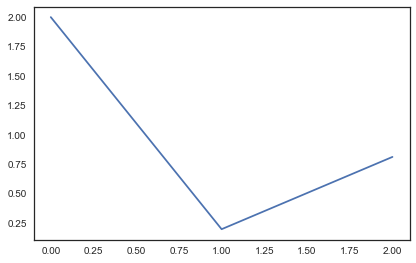

In [144]:
plt.plot(eig_val_cov)
plt.show()

C:\Users\aath\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


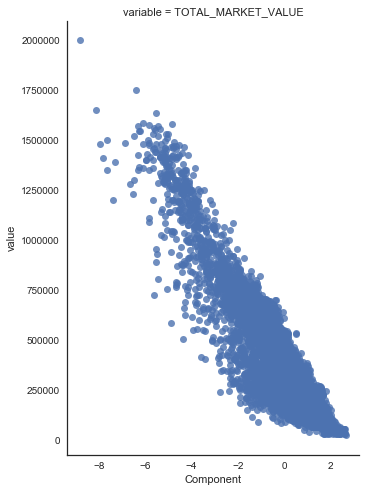

In [153]:
# Create P, which we will use to transform Cx into Cy to get Y, the
# dimensionally-reduced representation of X.
P = eig_vec_cov[:, 0]

# Transform X into Y.
Y = P.T.dot(Xt)

# Combine X and Y for plotting purposes.
data_to_plot = df_res[['TOTAL_MARKET_VALUE']]
data_to_plot['Component'] = Y
data_to_plot = pd.melt(data_to_plot, id_vars='Component')

g = sns.FacetGrid(data_to_plot, col="variable", size=7, aspect=.75)
g = g.map(
    sns.regplot,
    "Component",
    "value",
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
plt.show()